In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NO']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=8)

In [8]:
forest = RandomForestRegressor(n_estimators=1000,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=3,
                              min_samples_leaf=4,random_state=42)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=3,
                      n_estimators=1000, random_state=42)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.7545270696540773

Score on test data: 0.6780895965254251

Root Mean Squared Error: 29.674001618769974

Overall model accuracy: 0.6780895965254251


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=forest.predict(X)

In [12]:
predict

array([80.71154797, 74.73199388, 70.09172277, 76.20868544, 69.83604125,
       68.44990435, 54.59716898, 75.64283467, 69.28230731, 67.63253781,
       55.04404634, 52.84897576, 64.1934958 , 52.22929891, 49.18946317,
       48.46492909, 57.14260434, 43.37336598, 41.80845235, 43.40978799,
       43.94064283, 18.71160388, 16.94925692, 16.97884162, 18.88751967,
       10.83857459, 11.58450031, 13.20831094, 14.29268708, 12.45883138,
       11.71135452, 12.57848593, 13.46245778, 21.5755069 , 10.10090054,
       10.64428754, 12.46083481, 14.33455261, 83.95572548, 84.517666  ,
       84.92296042, 90.33670364, 86.45440846, 79.17866687, 65.27535543,
       67.50278838, 67.26568074, 84.09594685, 74.21265665, 64.79637231,
       64.71274798, 82.40537647])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

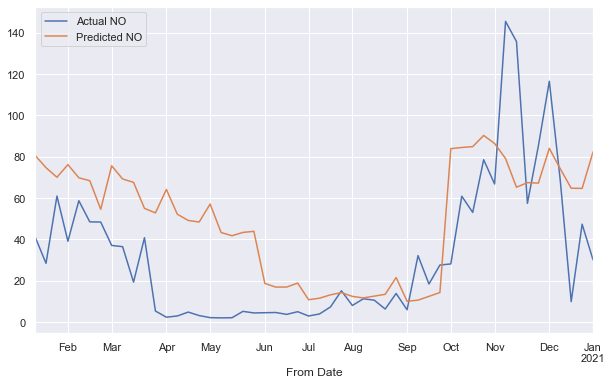

In [17]:
test['NO'].plot(legend=True, label='Actual NO', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO')


In [18]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 21.461520025386005
MSE: 880.546372070763
RMSE: 29.674001618769974
R-Squared: 0.6780895965254251


In [19]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 42.5831892533928
MSE: 5215.377352615819
RMSE: 72.21756955627778
R-Squared: 0.12159077646334193


In [20]:
import pickle
filename = 'NO_forestmodel.sav'
pickle.dump(forest, open(filename, 'wb'))
 

In [21]:
pred=X.loc["2020-03-25":"2020-04-14",'pred']
pred.median()

52.84897576398924

# 3rd plot

In [22]:
testcase = pd.DataFrame()

In [23]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [24]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [25]:
testcase

,test,pred,Corrected
224,31.445714,40.853691,11.179690
0,121.173333,136.519992,106.845990
297,11.560000,16.310335,-13.363667
347,11.471429,13.988197,-15.685805
163,51.680000,104.953367,75.279365
...,...,...,...
109,116.444286,129.415959,99.741957
168,48.902857,94.542597,64.868596
185,15.165714,16.371111,-13.302890
137,7.217857,12.831386,-16.842616


In [26]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [27]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8213524097102122

In [28]:
test2020=pd.DataFrame()

In [29]:
test2020['test']=test['NO']
test2020['pred']=X['pred']

In [30]:
test2020.index=test.index

In [31]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

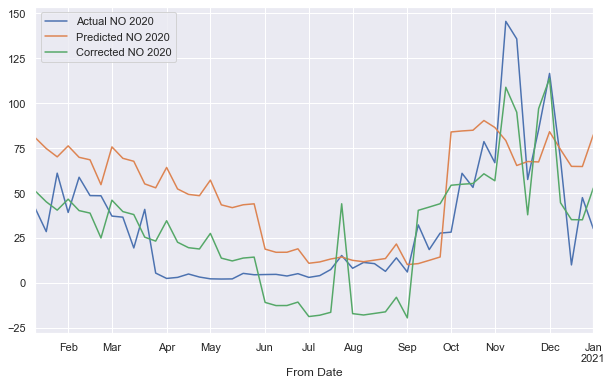

In [32]:
test2020['test'].plot(legend=True, label='Actual NO 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO 2020')

In [33]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.6373416097283577

In [34]:
ytest.std

<bound method Series.std of 224     31.445714
0      121.173333
297     11.560000
347     11.471429
163     51.680000
          ...    
109    116.444286
168     48.902857
185     15.165714
137      7.217857
333     26.341429
Name: NO, Length: 74, dtype: float64>